# OpenCV Benchmarking analysis

### Create dataset from combined benchmarks

In [17]:
from os import listdir
from os.path import isfile, join

benchmark_result_dir = './benchmark-results/'
csv_files = [benchmark_result_dir + f for f in listdir(benchmark_result_dir) if isfile(join(benchmark_result_dir, f))]

In [18]:
import pandas as pd

df_list = [ pd.read_csv(f) for f in csv_files ]
df = pd.concat(df_list)

In [19]:
df.columns = ['build', 'time']

df

,build,time
0,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7146115
1,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6875046
2,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6817011
3,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6864108
4,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6801007
...,...,...
1245,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,7026867
1246,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6921964
1247,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6891406
1248,opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eig...,6805067


### Group by build and aggregate with mean average, median average, standard deviation, min/max and percentiles

In [20]:
result = df.groupby('build', sort=False)['time'].aggregate(['describe', 'median'])
result.columns = result.columns.get_level_values(1)
result = result.rename(columns = {'time':'median'})
result = result.sort_values('median')

result

,count,mean,std,min,25%,50%,75%,max,median
build,,,,,,,,,
opencv-4.7.0-build-simplest,250.0,6723981.600,86845.636398,6539620.0,6667949.00,6720718.5,6772902.00,6994653.0,6720718.5
opencv-4.7.0-aocc-build-ipp-tbb-eigen-openmp,250.0,6858201.260,99181.627913,6670410.0,6790514.25,6848922.5,6899789.75,7196470.0,6848922.5
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-all-aocc,250.0,6885621.932,163593.581705,6653524.0,6802508.25,6859837.0,6924720.50,8666767.0,6859837.0
opencv-4.7.0-build-ipp-tbb-eigen-openmp,250.0,6886277.612,120767.970326,6654562.0,6824922.75,6875089.0,6918145.00,7670655.0,6875089.0
opencv-4.7.0-build-amdblas-amdfftw-ipp-tbb-eigen-openmp-gcc,250.0,6900521.088,83529.147784,6710378.0,6841775.25,6897566.0,6949285.50,7109110.0,6897566.0


### Bar graphs of top 5 builds

In [21]:
result = result.head(5)

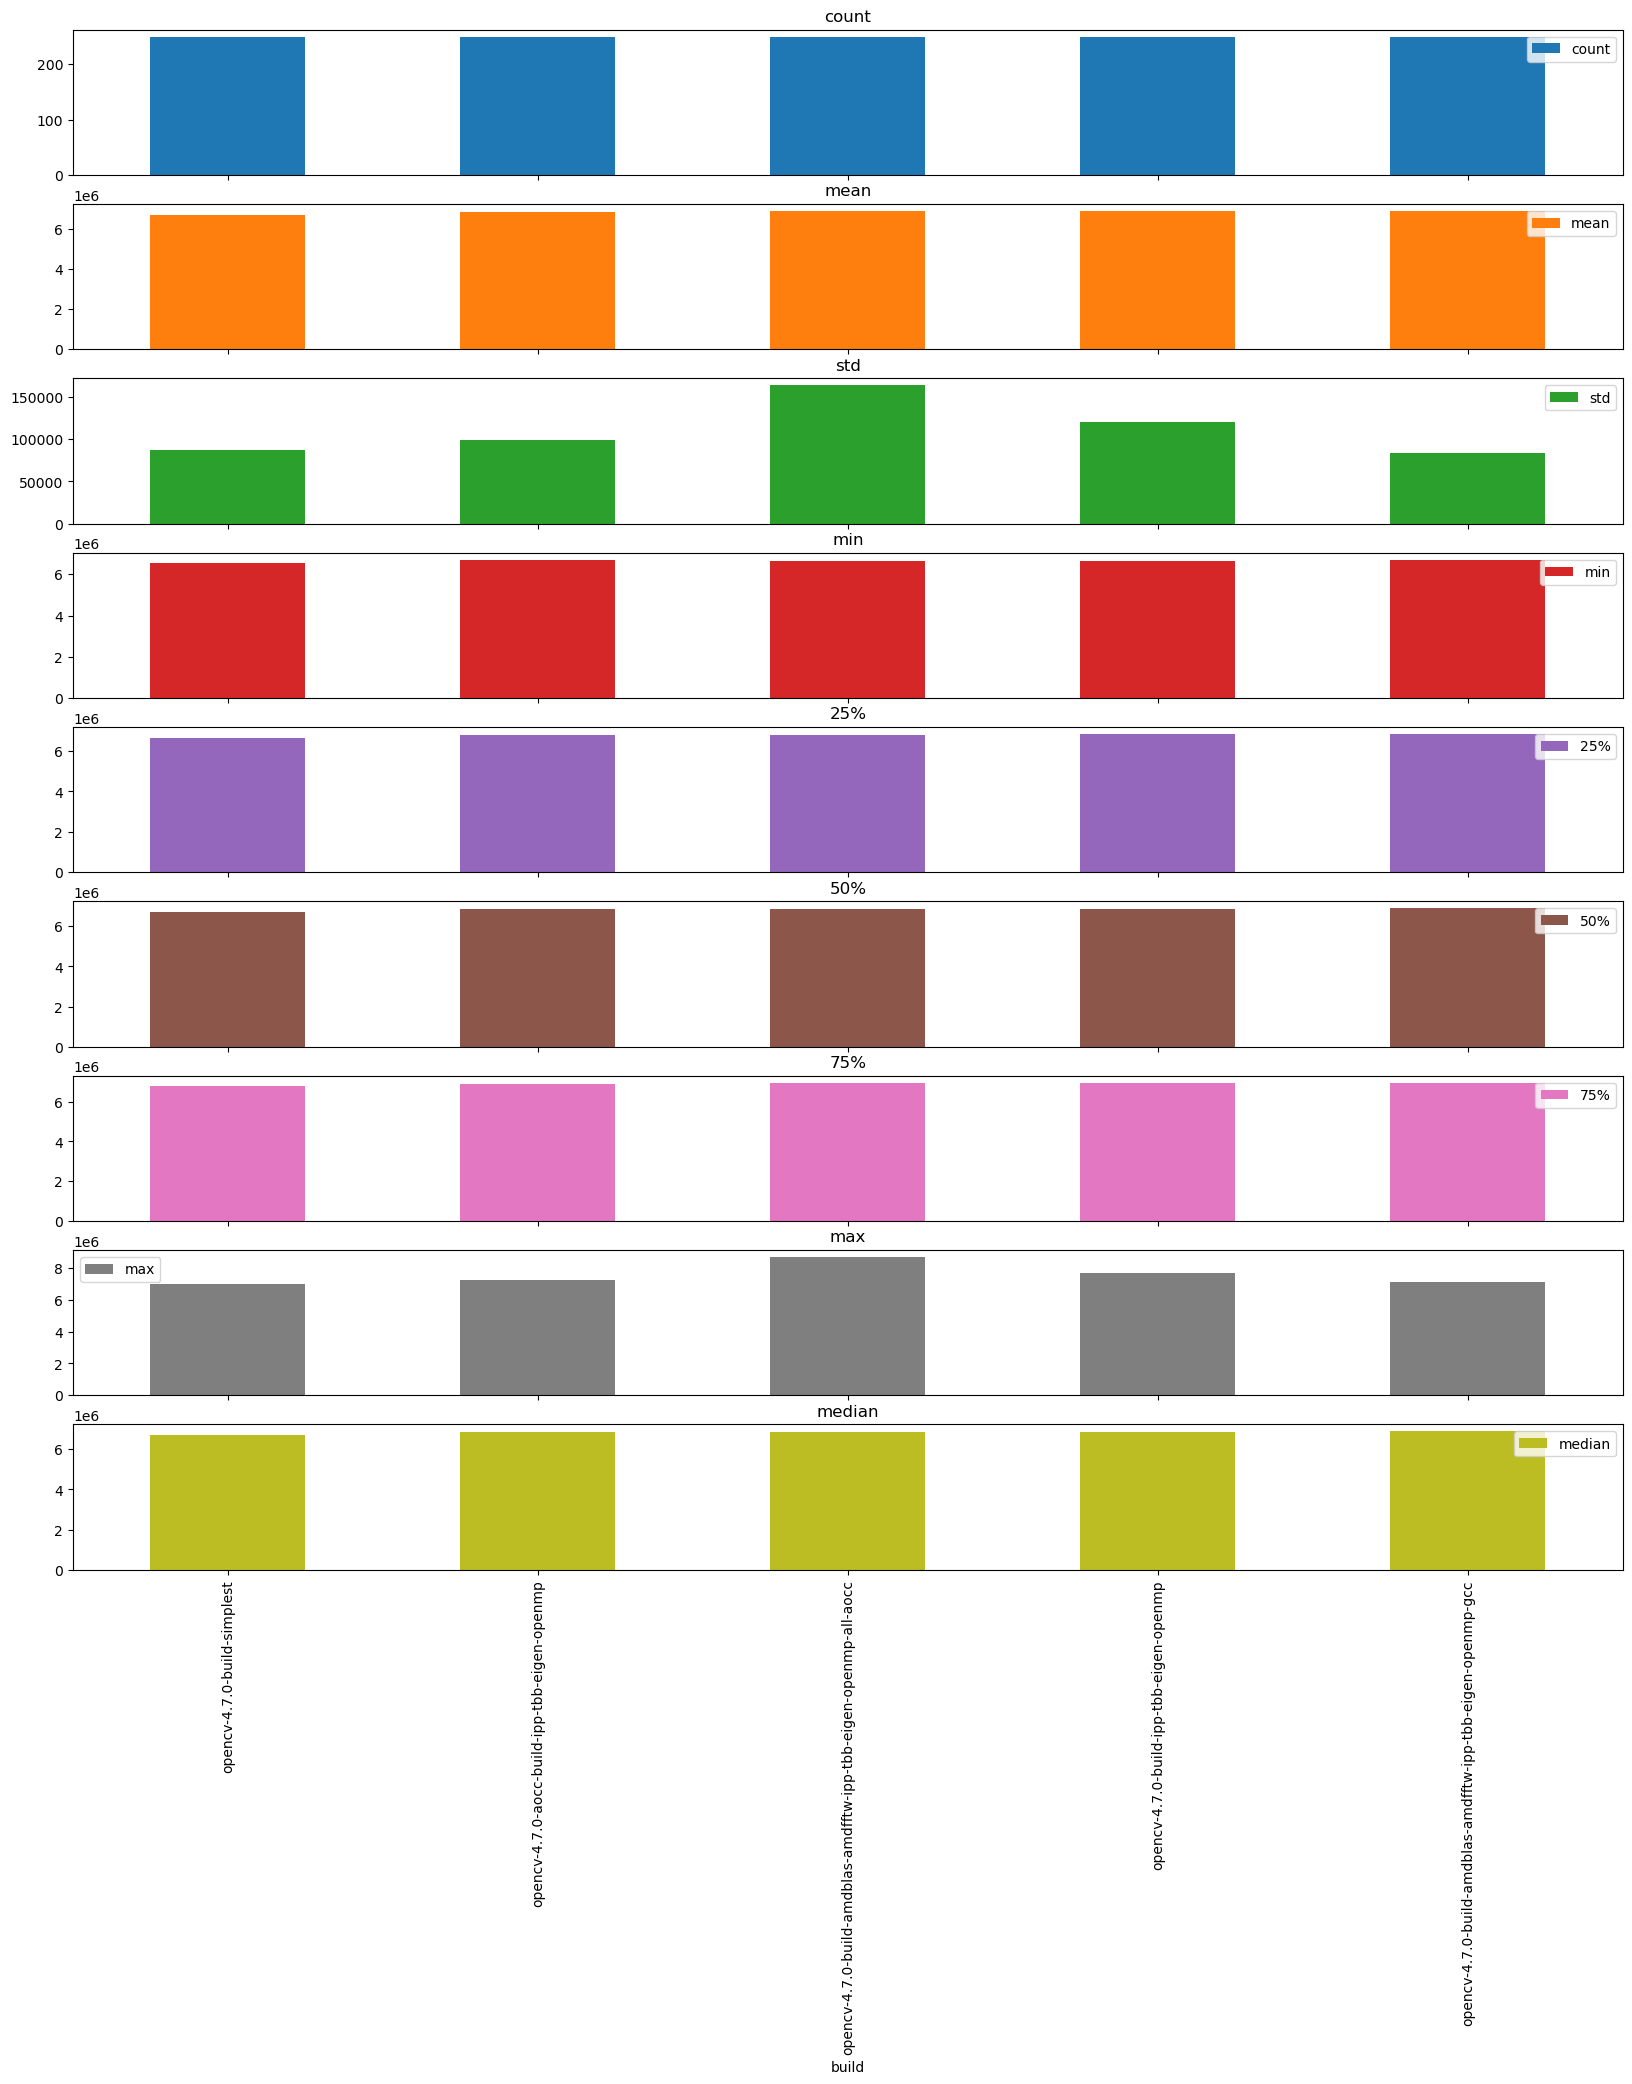

In [22]:
plt = result.plot.bar(subplots=True, figsize=(20,20))

I normalise the medians by subtracting the smallest one from all of them, to make it more obvious how big the difference is between them visually.

In [23]:
min_median = result['median'].min()
normalised = pd.DataFrame(result['median'].apply(lambda m: m - min_median))

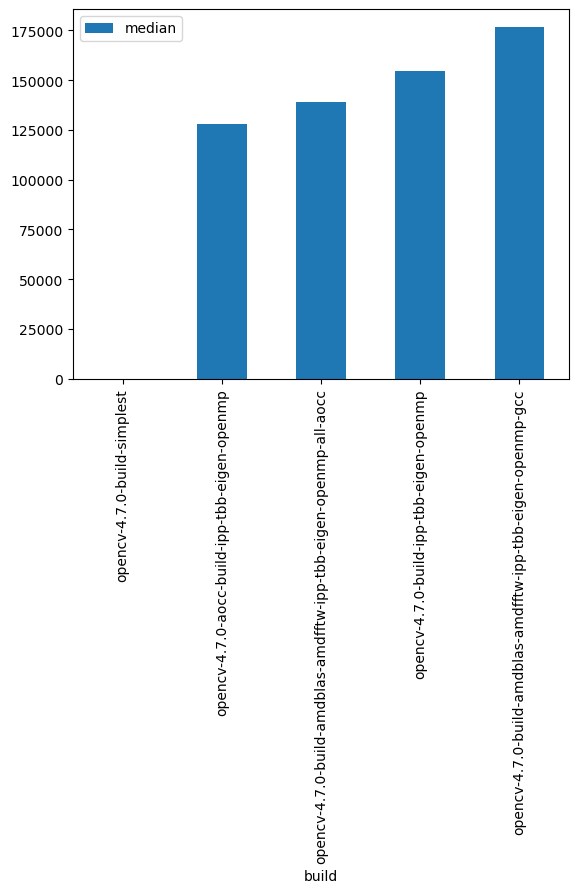

In [24]:
plt = normalised.plot.bar()